# Extract patches from fully sky healpix sims

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#folders
import sys, os

In [11]:
import numpy as np, re, healpy as H, glob
import scipy.ndimage as ndimage
from pylab import *

In [12]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'

In [25]:
reso_arcmin = 0.5
#ny, nx = 1560, 1560
boxsize = 1560
tcmb = 2.73 #K

which_sim = 'amber'

if which_sim == 'amber':
    sim_fd = '/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/'
    op_fd = 'amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/'
    searchstr = '%s/*/cmb/map_ksz_nside=8192.fits' %(sim_fd)
    ra0, dec0 = 352.5, -55.
elif which_sim == '21cmfast':
    sim_fd = '21cmFAST/'
    op_fd = sim_fd
    searchstr = '%s/maps/*.fits' %(sim_fd)
    ra0, dec0 = 0., 90.

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1//*/cmb/map_ksz_nside=8192.fits

Toal files = 2


/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1//*/cmb/map_ksz_nside=8192.fits

Toal files = 6

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

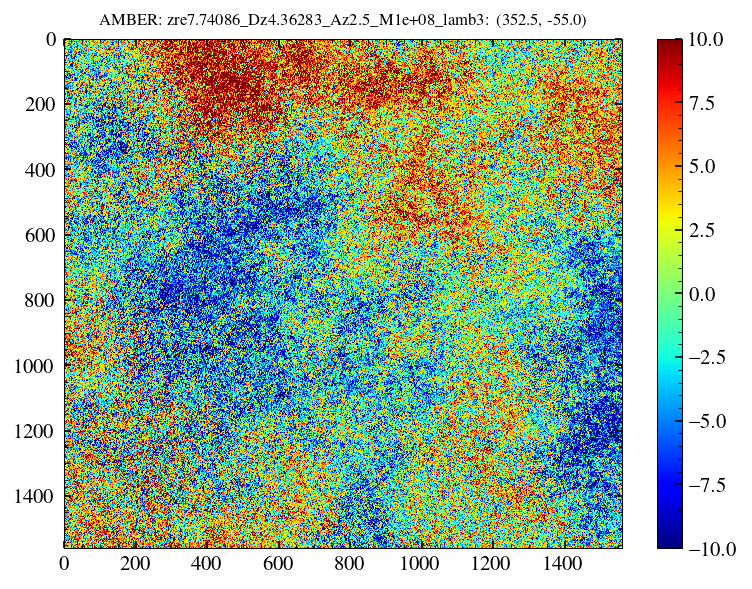

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

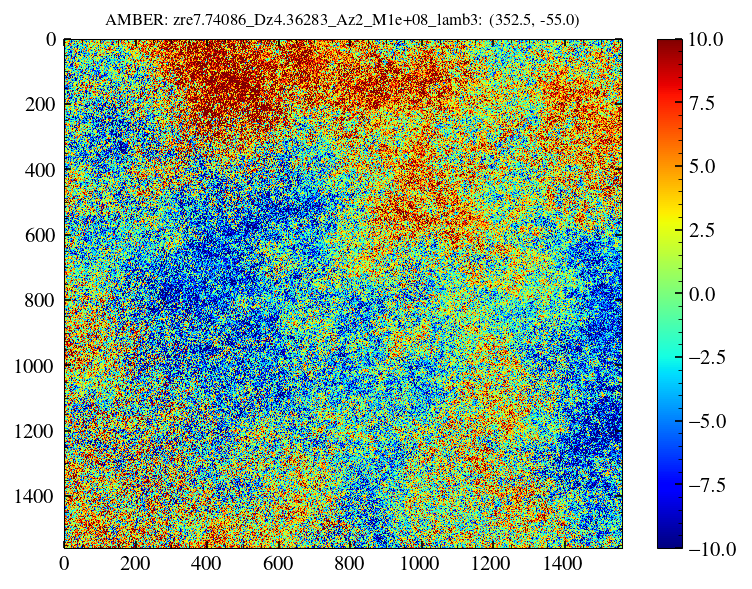

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

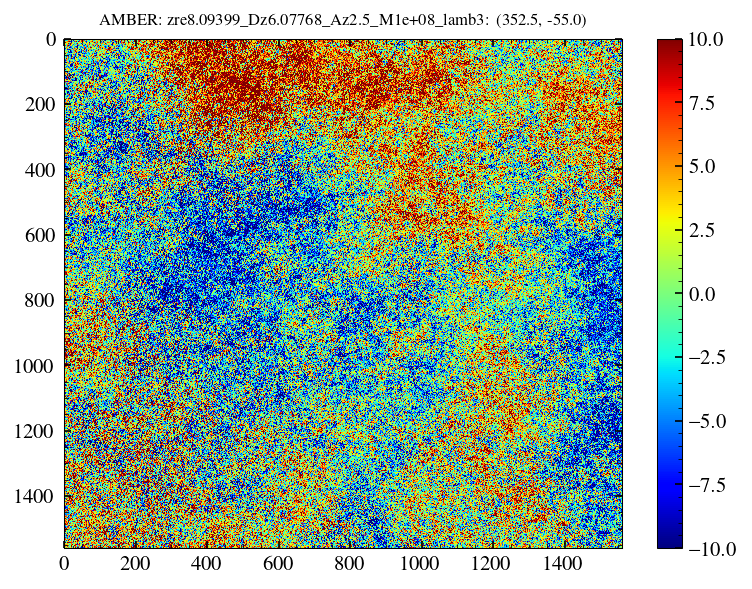

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

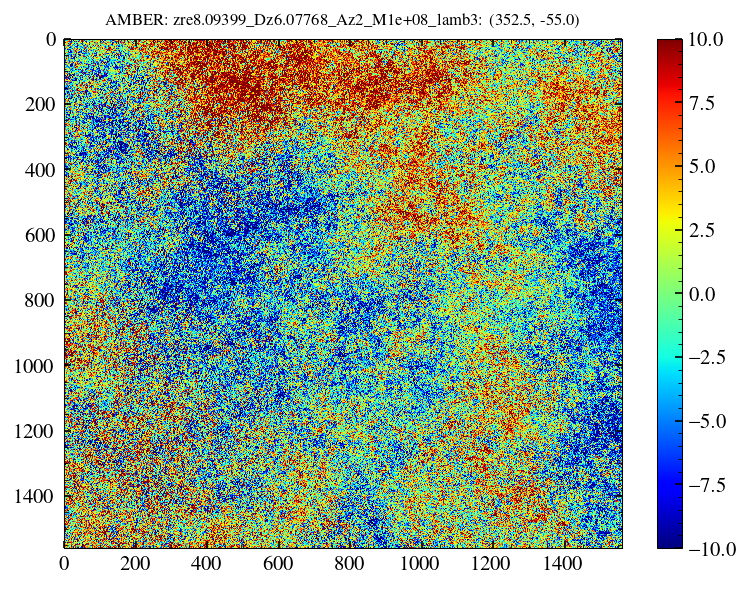

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

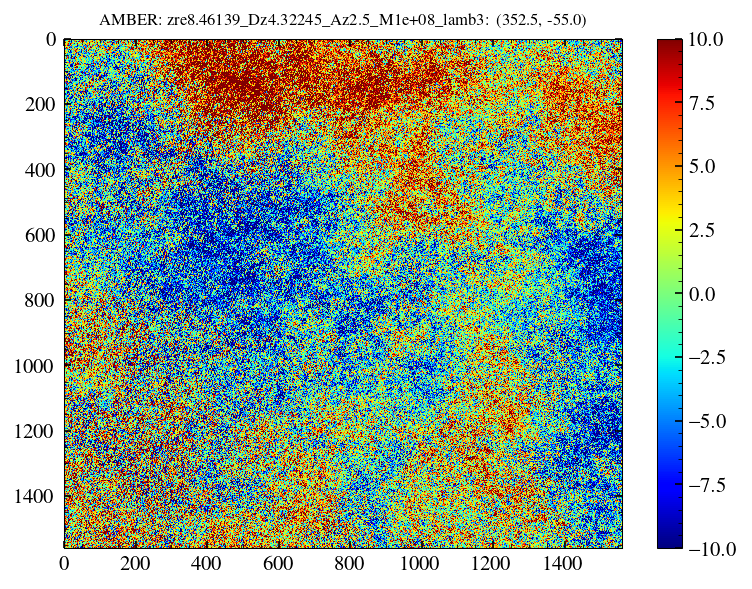

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

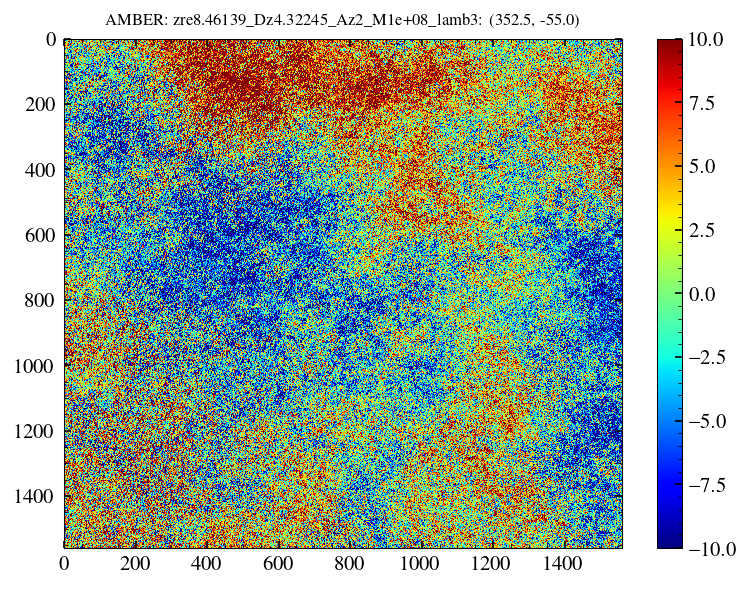


All done



In [36]:
print(searchstr)
flist = glob.glob( searchstr )
print('\nToal files = %s\n' %( len(flist) ) )

for fname in flist:
    print(fname)
    opfname = fname.replace('.fits', '.npy').replace(sim_fd, op_fd)
    hmap = H.read_map(fname) * 1e6 #in uK now
    
    if which_sim == 'amber':
        hmap = hmap * tcmb
        
    
    #H.mollview( hmap * 1e6, min = -.1, max = .1 ); show(); sys.exit()
    
    curr_smap = H.gnomview(hmap, rot=[ra0, dec0], xsize=boxsize, reso=reso_arcmin, return_projected_map=True); close()
    curr_smap = np.asarray( curr_smap ) - np.mean(curr_smap)
    print('\t%s' %(opfname))
    np.save(opfname, curr_smap)
    
    if which_sim == 'amber':
        tit_str = fname.split('/')[-3].replace('_nside8192', '')
        tit_str = 'AMBER: %s: (%s, %s)' %(tit_str, ra0, dec0)
    elif which_sim == '21cmfast':
        tit_str = fname.split('/')[-1]
        tit_str = '21cmFAST: %s: (%s, %s)' %(tit_str, ra0, dec0)

    clf()
    figure(figsize = (6., 4.5))
    ax = subplot(111)
    imshow(curr_smap, vmin = -10., vmax = 10., aspect = 'auto'); colorbar(); 
    title(tit_str, fontsize = 8); 
    show(); ##sys.exit()

print('\nAll done\n')

In [ ]:
'''
tmpmapfname = 'tmp_partial.fits'
masked_inds = np.where(hmap == 0.)[0]
hmap[masked_inds] = H.UNSEEN
H.write_map(tmpmapfname, hmap, partial = True)
'''